<a href="https://colab.research.google.com/github/Tarun9640/py/blob/master/Ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read images from folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from imutils import paths
from skimage.io import imread,imshow
import numpy as np
import pandas as pd
import cv2 

In [ ]:
imgpath=list(paths.list_images("/content/drive/MyDrive/images"))
imgpath

['/content/drive/MyDrive/images/download (1).jpg',
 '/content/drive/MyDrive/images/download (2).jpg',
 '/content/drive/MyDrive/images/download (3).jpg',
 '/content/drive/MyDrive/images/download (4).jpg',
 '/content/drive/MyDrive/images/download (5).jpg',
 '/content/drive/MyDrive/images/download (7).jpg',
 '/content/drive/MyDrive/images/download (10).jpg',
 '/content/drive/MyDrive/images/download (12).jpg',
 '/content/drive/MyDrive/images/images (1).jpg',
 '/content/drive/MyDrive/images/images (4).jpg']

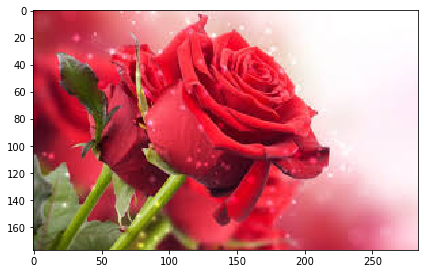

In [ ]:
#Display image
imshow('/content/drive/MyDrive/images/download (1).jpg')

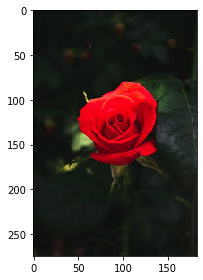

In [ ]:
imshow('/content/drive/MyDrive/images/download (10).jpg')

In [ ]:
df = []

for images in imgpath:
  img = imread(images)
  feature_matrix = np.zeros((320,450))
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      feature_matrix[i][j] = (int(img[i,j,0]) + int(img[i,j,1])+ int(img[i,j,2]))/3
  
  #Converting the array into 1D array
  feature = np.reshape(feature_matrix,(320*450))
  df.append(feature)

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,143960,143961,143962,143963,143964,143965,143966,143967,143968,143969,143970,143971,143972,143973,143974,143975,143976,143977,143978,143979,143980,143981,143982,143983,143984,143985,143986,143987,143988,143989,143990,143991,143992,143993,143994,143995,143996,143997,143998,143999
0,69.000000,72.000000,77.000000,81.000000,84.000000,85.000000,84.000000,84.000000,90.000000,90.000000,90.000000,90.000000,89.666667,89.666667,89.666667,89.666667,89.666667,89.666667,90.000000,91.333333,94.666667,100.000000,105.333333,108.333333,107.333333,107.333333,107.333333,108.333333,108.333333,109.333333,109.333333,109.333333,102.666667,102.000000,103.000000,103.333333,104.333333,105.333333,105.666667,106.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,216.666667,216.666667,215.666667,215.666667,214.666667,213.666667,212.666667,212.666667,206.666667,203.666667,199.666667,197.666667,200.666667,207.666667,216.666667,221.666667,213.000000,214.000000,215.000000,217.000000,218.000000,220.000000,221.000000,222.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,221.666667,220.666667,220.666667,220.666667,219.666667,219.666667,219.666667,219.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.000000,58.666667,57.666667,55.333333,54.333333,51.666667,50.000000,49.000000,56.666667,58.666667,60.666667,61.666667,60.666667,56.666667,52.666667,50.666667,51.333333,54.333333,60.333333,65.333333,70.333333,72.333333,73.333333,73.333333,76.333333,70.333333,65.666667,65.666667,64.333333,60.666667,60.666667,65.666667,67.666667,70.666667,73.666667,77.666667,79.000000,79.000000,78.000000,77.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.000000,36.000000,35.000000,34.000000,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,28.666667,28.666667,28.666667,28.666667,28.666667,28.666667,28.666667,28.666667,26.000000,25.000000,25.000000,23.333333,21.666667,21.666667,20.666667,20.666667,21.666667,21.666667,21.666667,21.666667,21.666667,21.666667,21.666667,21.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1 = df[[0,1,2,3,4,5]]
df1


,0,1,2,3,4,5
0,69.000000,72.000000,77.000000,81.000000,84.000000,85.000000
1,216.666667,216.666667,215.666667,215.666667,214.666667,213.666667
2,60.000000,58.666667,57.666667,55.333333,54.333333,51.666667
3,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
4,36.000000,36.000000,35.000000,34.000000,34.000000,33.000000
5,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
6,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
7,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
8,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
9,86.666667,99.333333,111.333333,109.333333,93.333333,76.000000


In [ ]:
#target_values
df1["Target_variable"] = [0,1,0,1,0,1,0,0,1,0]
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,Target_variable
0,69.000000,72.000000,77.000000,81.000000,84.000000,85.000000,0
1,216.666667,216.666667,215.666667,215.666667,214.666667,213.666667,1
2,60.000000,58.666667,57.666667,55.333333,54.333333,51.666667,0
3,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1
4,36.000000,36.000000,35.000000,34.000000,34.000000,33.000000,0
5,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1
6,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0
7,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0
8,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1
9,86.666667,99.333333,111.333333,109.333333,93.333333,76.000000,0


In [ ]:
x = df1
y = df1["Target_variable"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)
x_train.shape,y_train.shape

((8, 7), (8,))

In [ ]:
# Using random forest algorithm for classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
print(accuracy_score(y_test,y_pred))

1.0
